In [1]:
import opendatasets as od
import os

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

matplotlib.rcParams['figure.figsize']=(15,12)
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.facecolor']='#00000000'


In [2]:
od.download('https://www.kaggle.com/datasets/sheenabatra/facebook-data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading facebook-data.zip to .\facebook-data


100%|██████████| 1.82M/1.82M [00:00<00:00, 22.7MB/s]

# Understanding the data

In [6]:
datafile='facebook-data\pseudo_facebook.csv'

df=pd.read_csv(datafile)
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [7]:
df.head(5)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [8]:
df.tail(5)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [9]:
df.columns  

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [13]:
df.select_dtypes(np.number)

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,416.0,2560,185,4506,6516,4506,5760,0,756


In [14]:
df.select_dtypes(include='object')

,gender
0,male
1,female
2,male
3,female
4,male
...,...
98998,female
98999,female
99000,female
99001,female


In [21]:
df.isnull().sum() 

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [46]:
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [54]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


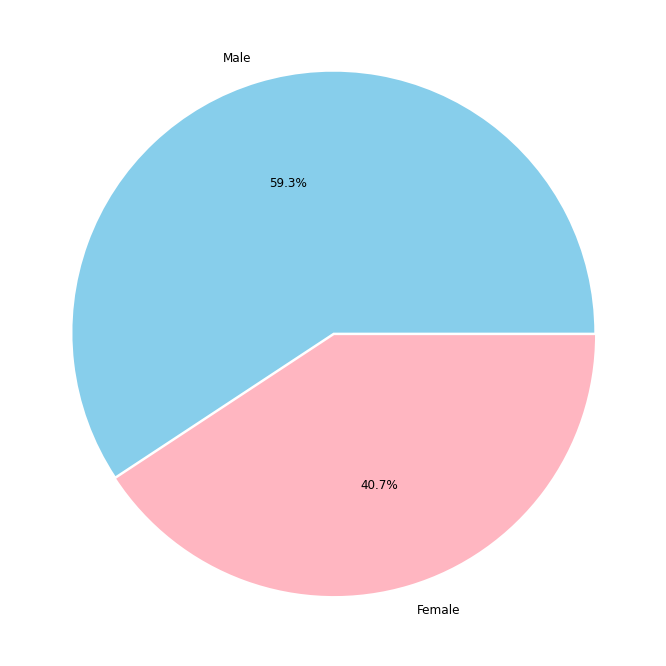

In [68]:
plt.pie(
    df['gender'].value_counts(), 
    colors=['skyblue', 'lightpink'], 
    labels=['Male', 'Female'], 
    autopct='%1.1f%%',
    explode=[0,0.01]
);


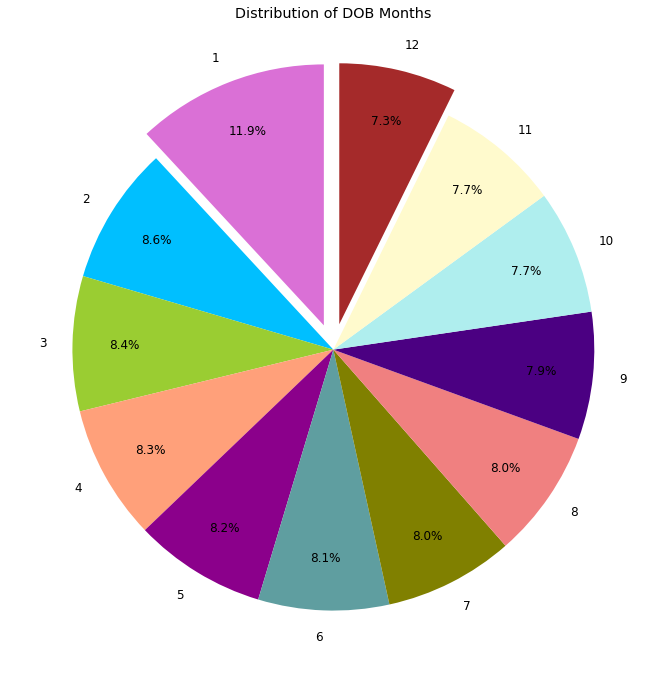

In [85]:
pcolors= ['orchid', 'deepskyblue', 'yellowgreen', 'lightsalmon',
          'darkmagenta', 'cadetblue', 'olive', 'lightcoral',
          'indigo', 'paleturquoise', 'lemonchiffon', 'brown']

plt.title('Distribution of DOB Months');
plt.pie(
    df['dob_month'].value_counts(), 
    autopct='%1.1f%%',
    pctdistance=0.8,
    colors=pcolors,
    startangle=90,
    labels=[1,2,3,4,5,6,7,8,9,10,11,12],
    explode=[0.1,0,0,0,0,0,0,0,0,0,0,0.1]
);


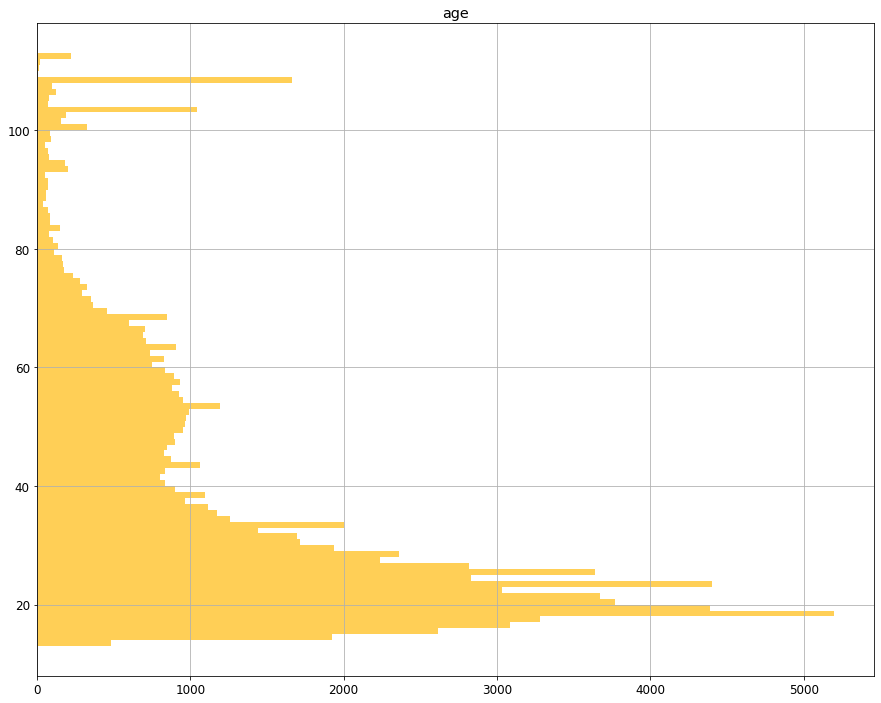

In [115]:
df.hist('age', bins=100, color='#FFCF56', orientation='horizontal');
